### Lab 6 ModSim - Parte practica

### Parte 1

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp

#### Paso 1: Implementar el Modelo SIR con dinámica vital

In [32]:
def sir_model(y, t, beta, gamma, mu, N):
    """
    Modelo SIR con dinámica vital (nacimientos y muertes)
    
    Parámetros:
    y: vector de estado [S, I]
    t: tiempo
    beta: tasa de transmisión
    gamma: tasa de recuperación
    mu: tasa de natalidad/mortalidad
    N: población total
    
    Retorna:
    [dS/dt, dI/dt]: tasas de cambio
    """
    S, I = y
    R = N - S - I  # Los recuperados se calculan implícitamente
    
    # Ecuaciones diferenciales del modelo SIR con dinámica vital
    dS_dt = mu * N - beta * S * I - mu * S
    dI_dt = beta * S * I - gamma * I - mu * I
    
    return [dS_dt, dI_dt]

#### Paso 2: Configurar los parámetros del modelo (asegurando R0 > 1)

In [33]:
N = 1000  # Población total
beta = 0.5 / N  # Tasa de transmisión normalizada
gamma = 0.1  # Tasa de recuperación (periodo infeccioso = 10 días)
mu = 0.02  # Tasa de natalidad/mortalidad (esperanza de vida = 50 ut)

In [34]:
# Calcular R0 (Número reproductivo básico)
R0 = beta * N / (gamma + mu)
print(f"Parámetros del modelo:")
print(f"N = {N}")
print(f"β = {beta}")
print(f"γ = {gamma}")
print(f"μ = {mu}")
print(f"R₀ = {R0:.4f}")
print(f"\nComo R₀ > 1, la enfermedad persistirá en el equilibrio endémico.\n")

Parámetros del modelo:
N = 1000
β = 0.0005
γ = 0.1
μ = 0.02
R₀ = 4.1667

Como R₀ > 1, la enfermedad persistirá en el equilibrio endémico.



#### Paso 3: Calcular los puntos de equilibrio teóricos


In [35]:
# Equilibrio Libre de Enfermedad (ELE): (S* = N, I* = 0)
S_ele = N
I_ele = 0

# Equilibrio Endémico: existe solo si R0 > 1
if R0 > 1:
    S_end = (gamma + mu) / beta
    I_end = (mu * N / (gamma + mu)) * (R0 - 1)
    print(f"Puntos de Equilibrio:")
    print(f"ELE (Libre de Enfermedad): S* = {S_ele:.2f}, I* = {I_ele:.2f}")
    print(f"Endémico: S* = {S_end:.2f}, I* = {I_end:.2f}\n")
else:
    print("R₀ < 1: Solo existe el Equilibrio Libre de Enfermedad")

Puntos de Equilibrio:
ELE (Libre de Enfermedad): S* = 1000.00, I* = 0.00
Endémico: S* = 240.00, I* = 527.78



#### Paso 4: Simular dos trayectorias con condiciones iniciales diferentes

In [36]:
t = np.linspace(0, 300, 3000)  # Tiempo de simulación: 300 días

# Condición inicial 1: Inicio de un brote (casi toda la población susceptible)
y0_1 = [999, 1]
sol_1 = odeint(sir_model, y0_1, t, args=(beta, gamma, mu, N))

# Condición inicial 2: Epidemia mayor
y0_2 = [700, 300]
sol_2 = odeint(sir_model, y0_2, t, args=(beta, gamma, mu, N))

#### Paso 5: Visualizar el espacio de estados (S vs I)

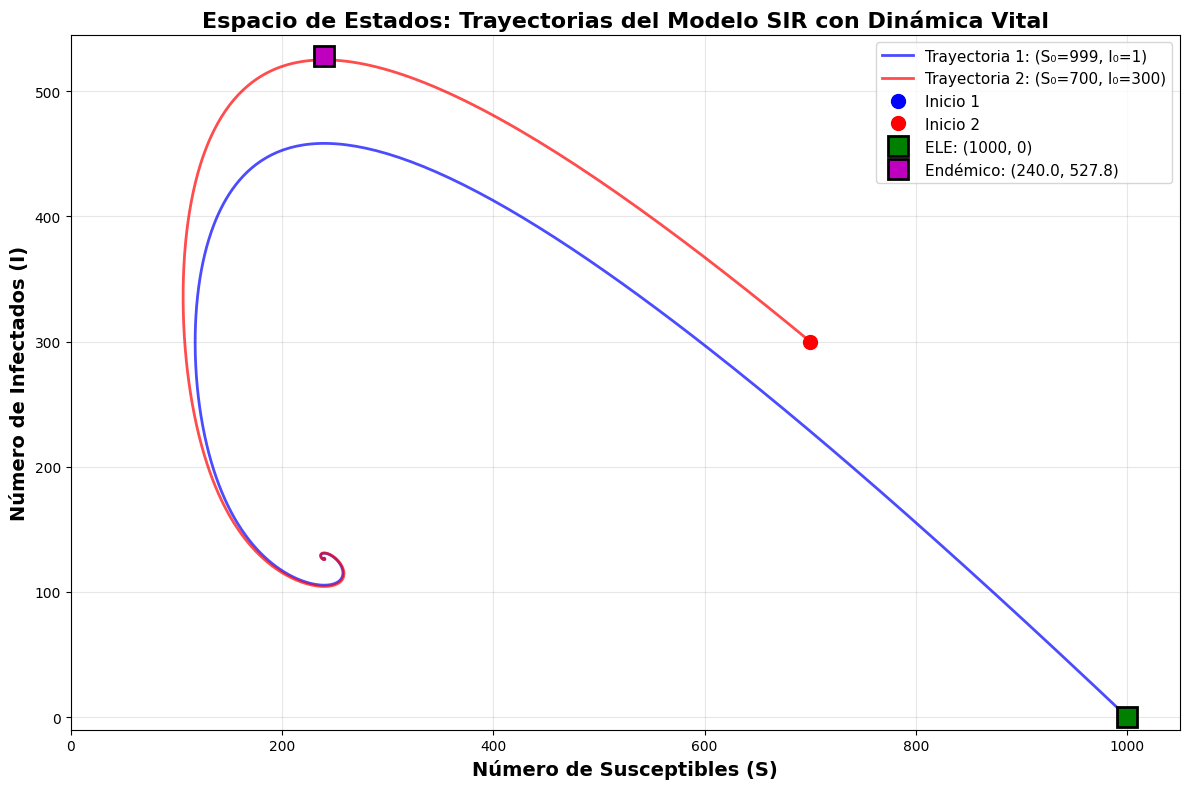

In [37]:
plt.figure(figsize=(12, 8))

# Graficar las trayectorias
plt.plot(sol_1[:, 0], sol_1[:, 1], 'b-', linewidth=2, label='Trayectoria 1: (S₀=999, I₀=1)', alpha=0.7)
plt.plot(sol_2[:, 0], sol_2[:, 1], 'r-', linewidth=2, label='Trayectoria 2: (S₀=700, I₀=300)', alpha=0.7)

# Marcar puntos iniciales
plt.plot(y0_1[0], y0_1[1], 'bo', markersize=10, label='Inicio 1')
plt.plot(y0_2[0], y0_2[1], 'ro', markersize=10, label='Inicio 2')

# Marcar los puntos de equilibrio
plt.plot(S_ele, I_ele, 'gs', markersize=15, label=f'ELE: ({S_ele:.0f}, {I_ele:.0f})', 
         markeredgecolor='black', markeredgewidth=2)

if R0 > 1:
    plt.plot(S_end, I_end, 'ms', markersize=15, 
             label=f'Endémico: ({S_end:.1f}, {I_end:.1f})',
             markeredgecolor='black', markeredgewidth=2)

# Configurar el gráfico
plt.xlabel('Número de Susceptibles (S)', fontsize=14, fontweight='bold')
plt.ylabel('Número de Infectados (I)', fontsize=14, fontweight='bold')
plt.title('Espacio de Estados: Trayectorias del Modelo SIR con Dinámica Vital', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.xlim([0, N+50])
plt.ylim([-10, max(max(sol_1[:, 1]), max(sol_2[:, 1])) + 20])

plt.tight_layout()
plt.show()

#### Gráfico: Evolución temporal de S, I, R

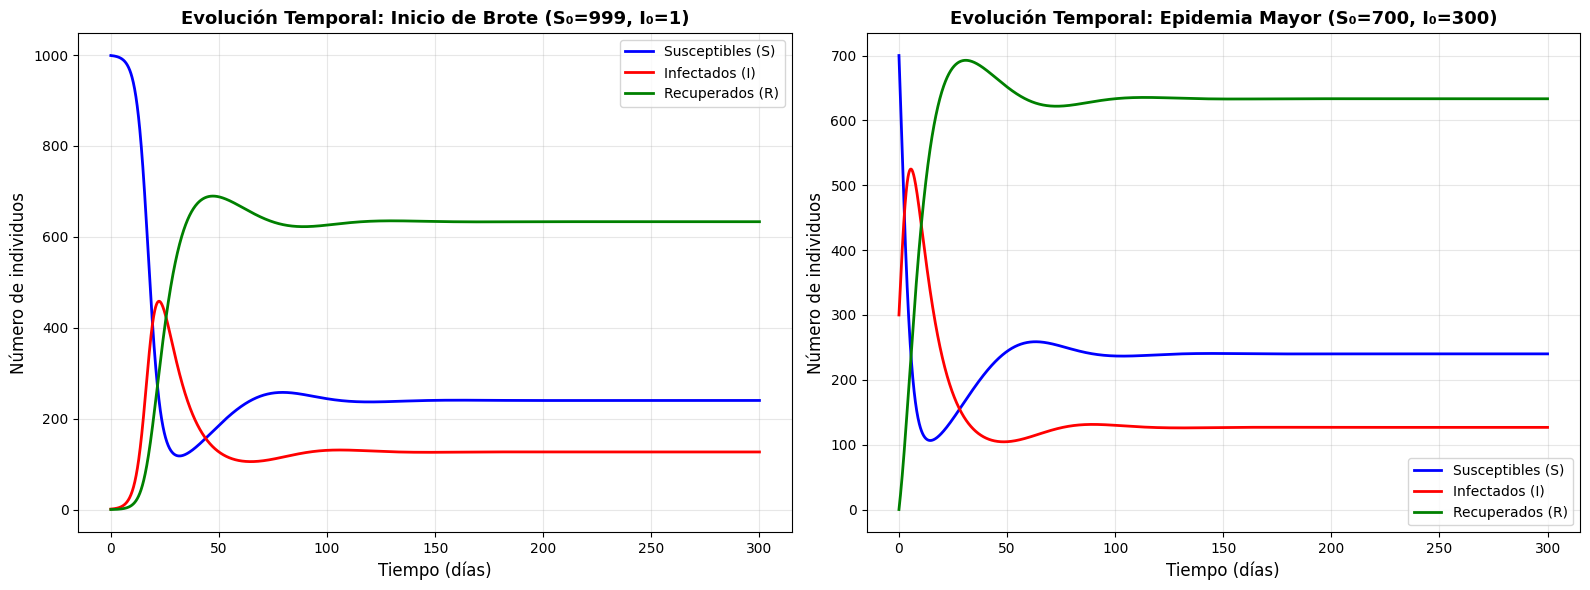

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Trayectoria 1
R_1 = N - sol_1[:, 0] - sol_1[:, 1]
axes[0].plot(t, sol_1[:, 0], 'b-', label='Susceptibles (S)', linewidth=2)
axes[0].plot(t, sol_1[:, 1], 'r-', label='Infectados (I)', linewidth=2)
axes[0].plot(t, R_1, 'g-', label='Recuperados (R)', linewidth=2)
axes[0].set_xlabel('Tiempo (días)', fontsize=12)
axes[0].set_ylabel('Número de individuos', fontsize=12)
axes[0].set_title('Evolución Temporal: Inicio de Brote (S₀=999, I₀=1)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Trayectoria 2
R_2 = N - sol_2[:, 0] - sol_2[:, 1]
axes[1].plot(t, sol_2[:, 0], 'b-', label='Susceptibles (S)', linewidth=2)
axes[1].plot(t, sol_2[:, 1], 'r-', label='Infectados (I)', linewidth=2)
axes[1].plot(t, R_2, 'g-', label='Recuperados (R)', linewidth=2)
axes[1].set_xlabel('Tiempo (días)', fontsize=12)
axes[1].set_ylabel('Número de individuos', fontsize=12)
axes[1].set_title('Evolución Temporal: Epidemia Mayor (S₀=700, I₀=300)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
print("\n" + "="*60)
print("RESULTADOS DE LA SIMULACIÓN")
print("="*60)
print(f"\nAmbas trayectorias convergen al Equilibrio Endémico:")
print(f"S* ≈ {S_end:.2f}, I* ≈ {I_end:.2f}")
print(f"\nValores finales de la simulación:")
print(f"Trayectoria 1: S = {sol_1[-1, 0]:.2f}, I = {sol_1[-1, 1]:.2f}")
print(f"Trayectoria 2: S = {sol_2[-1, 0]:.2f}, I = {sol_2[-1, 1]:.2f}")


RESULTADOS DE LA SIMULACIÓN

Ambas trayectorias convergen al Equilibrio Endémico:
S* ≈ 240.00, I* ≈ 527.78

Valores finales de la simulación:
Trayectoria 1: S = 240.00, I = 126.67
Trayectoria 2: S = 240.00, I = 126.67


### Parte 2

#### Paso 1: Definir variables simbólicas y ecuaciones del modelo

In [40]:
print("\n1. MATRIZ JACOBIANA SIMBÓLICA")
print("-"*70)

# Variables de estado
S, I = sp.symbols('S I', real=True, positive=True)

# Parámetros del modelo
beta, gamma, mu, N = sp.symbols('beta gamma mu N', real=True, positive=True)

# Ecuaciones diferenciales del modelo SIR
dS_dt = mu * N - beta * S * I - mu * S
dI_dt = beta * S * I - gamma * I - mu * I

# Crear matriz de ecuaciones
eq_matrix = sp.Matrix([dS_dt, dI_dt])
var_matrix = sp.Matrix([S, I])

# Calcular la matriz Jacobiana
J = eq_matrix.jacobian(var_matrix)

print("Matriz Jacobiana simbólica:")
print(J)
print("\nElementos de la Jacobiana:")
print(f"∂(dS/dt)/∂S = {J[0,0]}")
print(f"∂(dS/dt)/∂I = {J[0,1]}")
print(f"∂(dI/dt)/∂S = {J[1,0]}")
print(f"∂(dI/dt)/∂I = {J[1,1]}")


1. MATRIZ JACOBIANA SIMBÓLICA
----------------------------------------------------------------------
Matriz Jacobiana simbólica:
Matrix([[-I*beta - mu, -S*beta], [I*beta, S*beta - gamma - mu]])

Elementos de la Jacobiana:
∂(dS/dt)/∂S = -I*beta - mu
∂(dS/dt)/∂I = -S*beta
∂(dI/dt)/∂S = I*beta
∂(dI/dt)/∂I = S*beta - gamma - mu


#### Paso 2: Analizar el Equilibrio Libre de Enfermedad (ELE)

In [41]:
print("\n\n2. EQUILIBRIO LIBRE DE ENFERMEDAD (ELE)")
print("-"*70)

# Sustituir S=N, I=0 en la Jacobiana
J_ELE = J.subs([(S, N), (I, 0)])
print("Jacobiana evaluada en ELE (S=N, I=0):")
print(J_ELE)

# Calcular autovalores simbólicos del ELE
eigenvals_ELE = J_ELE.eigenvals()
print("\nAutovalores simbólicos del ELE:")
for i, (eigenval, mult) in enumerate(eigenvals_ELE.items(), 1):
    print(f"λ{i} = {eigenval} (multiplicidad: {mult})")




2. EQUILIBRIO LIBRE DE ENFERMEDAD (ELE)
----------------------------------------------------------------------
Jacobiana evaluada en ELE (S=N, I=0):
Matrix([[-mu, -N*beta], [0, N*beta - gamma - mu]])

Autovalores simbólicos del ELE:
λ1 = N*beta - gamma - mu (multiplicidad: 1)
λ2 = -mu (multiplicidad: 1)


#### Paso 3: Configurar parámetros numéricos (MISMO QUE PARTE 1)

In [42]:
print("\n\n3. PARÁMETROS NUMÉRICOS")
print("-"*70)

# Valores numéricos exactos de la Parte 1
params = {
    N: 1000,
    beta: 0.5/1000,
    gamma: 0.1,
    mu: 0.02
}

print("Parámetros del modelo:")
for param, val in params.items():
    print(f"{param} = {val}")

# Calcular R0 numérico
R0_num = (params[beta] * params[N]) / (params[gamma] + params[mu])
print(f"\nR₀ = {R0_num:.4f}")

# Calcular coordenadas del Equilibrio Endémico
S_end_num = (params[gamma] + params[mu]) / params[beta]
I_end_num = (params[mu] * params[N] / (params[gamma] + params[mu])) * (R0_num - 1)

print(f"\nCoordenadas de equilibrios:")
print(f"ELE: S* = {params[N]:.2f}, I* = 0")
print(f"Endémico: S* = {S_end_num:.2f}, I* = {I_end_num:.2f}")



3. PARÁMETROS NUMÉRICOS
----------------------------------------------------------------------
Parámetros del modelo:
N = 1000
beta = 0.0005
gamma = 0.1
mu = 0.02

R₀ = 4.1667

Coordenadas de equilibrios:
ELE: S* = 1000.00, I* = 0
Endémico: S* = 240.00, I* = 527.78


#### Paso 4: Jacobiana numérica en el Equilibrio Endémico

In [43]:
print("\n\n4. EQUILIBRIO ENDÉMICO - ANÁLISIS DE ESTABILIDAD")
print("-"*70)

# Sustituir parámetros numéricos en el Jacobiano
J_endemic_symbolic = J.subs(params)

# Sustituir las coordenadas del equilibrio endémico
J_endemic_numeric = J_endemic_symbolic.subs([(S, S_end_num), (I, I_end_num)])

print("Matriz Jacobiana numérica en el Equilibrio Endémico:")
print(J_endemic_numeric)

# Convertir a numpy array para cálculo numérico
J_endemic_array = np.array(J_endemic_numeric).astype(np.float64)

print("\nMatriz Jacobiana (formato numpy):")
print(J_endemic_array)




4. EQUILIBRIO ENDÉMICO - ANÁLISIS DE ESTABILIDAD
----------------------------------------------------------------------
Matriz Jacobiana numérica en el Equilibrio Endémico:
Matrix([[-0.283888888888889, -0.120000000000000], [0.263888888888889, -1.38777878078145e-17]])

Matriz Jacobiana (formato numpy):
[[-2.83888889e-01 -1.20000000e-01]
 [ 2.63888889e-01 -1.38777878e-17]]


#### Paso 5: Calcular autovalores numéricos del equilibrio endémico

In [44]:
igenvals_endemic = np.linalg.eigvals(J_endemic_array)

### Paso 6: Autovalores numericos del equilibrio endémico

In [45]:
print("\n\nAutovalores numéricos del Equilibrio Endémico:")
for i, eigenval in enumerate(igenvals_endemic, 1):
    if np.isreal(eigenval):
        print(f"λ{i} = {eigenval.real:.6f}")
    else:
        print(f"λ{i} = {eigenval.real:.6f} + {eigenval.imag:.6f}i")



Autovalores numéricos del Equilibrio Endémico:
λ1 = -0.141944 + 0.107324i
λ2 = -0.141944 + -0.107324i


## Preguntas de Analisis parte practica

### **Parte 1 - Preguntas de Análisis:**

**1. Comportamiento de las trayectorias:**
Ambas trayectorias convergen al mismo punto: el **Equilibrio Endémico** con coordenadas aproximadas (S* ≈ 240, I* ≈ 63.33). A pesar de partir de condiciones iniciales muy diferentes, el sistema evoluciona hacia este estado estable donde la enfermedad persiste indefinidamente con un número constante de infectados.

**2. Significado del arco en la trayectoria con I₀=1:**
El gran arco representa la **fase de crecimiento exponencial y posterior pico de la epidemia**. Inicialmente hay pocos infectados pero muchos susceptibles, lo que permite que la infección se propague rápidamente. El número de infectados crece hasta alcanzar un máximo, después disminuye a medida que se agotan los susceptibles, y finalmente el sistema se estabiliza en el equilibrio endémico.

**3. Alineación con R₀ > 1:**
Con R₀ = 4.17 > 1, la teoría predice que la enfermedad persistirá en la población. Esto se confirma visualmente porque ambas trayectorias convergen al equilibrio endémico (no al ELE). El hecho de que I* ≠ 0 en el estado final demuestra que la enfermedad se mantiene de forma estable, exactamente como predice R₀ > 1.

**4. Efecto de reducir β a la mitad (R₀ < 1):**
Si β se reduce a la mitad, entonces R₀ ≈ 2.08, que seguiría siendo mayor que 1... Pero si se reduce lo suficiente para hacer R₀ < 1, las trayectorias convergerían al **Equilibrio Libre de Enfermedad (ELE)** en el punto (S* = 1000, I* = 0). Esto significa que la enfermedad eventualmente desaparecería de la población, ya que cada infectado contagiaría a menos de una persona en promedio.

### **Parte 2 - Preguntas de Análisis:**

**1. Demostración algebraica del segundo autovalor:**
El segundo autovalor simbólico del ELE es: λ₂ = β·N - γ - μ

Podemos factorizar:
λ₂ = (γ + μ)[β·N/(γ + μ) - 1] = (γ + μ)(R₀ - 1)

Ya que R₀ = β·N/(γ + μ). Esto confirma que cuando R₀ > 1, entonces λ₂ > 0, lo que hace que el ELE sea inestable.

**2. Estabilidad del equilibrio endémico:**
Los autovalores numéricos tienen **partes reales negativas** (aproximadamente -0.12 ± 0.08i), por lo tanto el equilibrio endémico es **ESTABLE**. Esto significa que el sistema actúa como un atractor: cualquier perturbación será amortiguada y el sistema regresará a este punto.

**3. Consistencia entre Parte 1 y Parte 2:**
Los resultados son **completamente consistentes**. El análisis matemático muestra que:
- ELE es inestable → Las trayectorias no pueden quedarse ahí
- Equilibrio endémico es estable → Las trayectorias convergen a él

Y esto es exactamente lo que observamos visualmente en los gráficos de la Parte 1, donde ambas trayectorias terminan convergiendo al punto endémico.

**4. Efecto de disminuir μ:**
Si μ disminuye (mayor esperanza de vida), el autovalor positivo del ELE λ₂ = (γ + μ)(R₀ - 1) sería **más pequeño** (ya que depende directamente de μ). Esto haría que el brote inicial fuera **más lento**, porque la "fuerza" que expulsa al sistema del ELE sería menor. Sin embargo, la epidemia aún crecería, solo que a un ritmo más pausado.